In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Credit Card data

HSData = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\Heart_Strokes.csv", header=0)

# Copy to back-up file

HSData_bk = HSData.copy()

# Display first 5 values

HSData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
# display the HS data information

HSData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

stroke_count = HSData.stroke.value_counts()
print('Class 0:', stroke_count[0])
print('Class 1:', stroke_count[1])
print('Proportion:', round(stroke_count[0] / stroke_count[1], 2), ': 1')
print('Total HS Records:', len(HSData))

Class 0: 42617
Class 1: 783
Proportion: 54.43 : 1
Total HS Records: 43400


In [5]:
# Display the null values

HSData.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

HSData['smoking_status'] = imputer_str.fit_transform(HSData[['smoking_status']])

In [7]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

HSData['bmi'] = imputer_int.fit_transform(HSData[['bmi']])

In [8]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

HSData['gender'] = LE.fit_transform(HSData[['gender']])
HSData['ever_married'] = LE.fit_transform(HSData[['ever_married']])
HSData['work_type'] = LE.fit_transform(HSData[['work_type']])
HSData['Residence_type'] = LE.fit_transform(HSData[['Residence_type']])
HSData['smoking_status'] = LE.fit_transform(HSData[['smoking_status']])

In [9]:
HSData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [10]:
HSData.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
cols1 = ['age', 'avg_glucose_level', 'bmi']

In [12]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in HSData.columns:
    if col != 'stroke':
        IndepVar.append(col)

TargetVar = 'stroke'

x = HSData[IndepVar]
y = HSData[TargetVar]

In [13]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30380, 11), (13020, 11), (30380,), (13020,))

In [14]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [18]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\HTResults.csv", header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0   235]
 [    0 12785]]
Outcome values : 
 0 235 0 12785
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       235
           0       0.98      1.00      0.99     12785

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020

Accuracy : 98.2 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


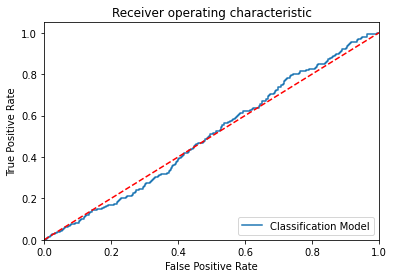

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[   15   220]
 [  250 12535]]
Outcome values : 
 15 220 250 12535
Classification report : 
               precision    recall  f1-score   support

           1       0.06      0.06      0.06       235
           0       0.98      0.98      0.98     12785

    accuracy                           0.96     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.96      0.96     13020

Accuracy : 96.4 %
Precision : 5.7 %
Recall : 6.4 %
F1 Score : 0.06
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 52.2 %
roc_auc_score: 0.522


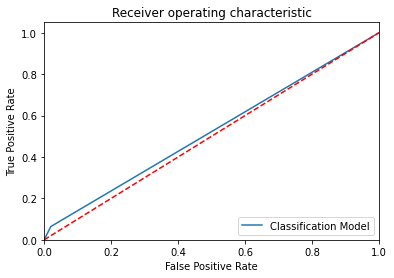

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[    0   235]
 [    1 12784]]
Outcome values : 
 0 235 1 12784
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       235
           0       0.98      1.00      0.99     12785

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020

Accuracy : 98.2 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


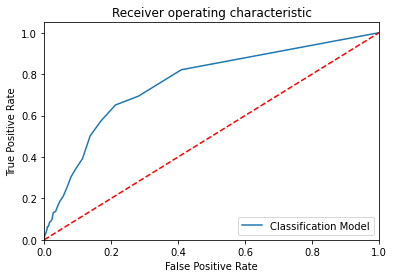

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[    1   234]
 [    9 12776]]
Outcome values : 
 1 234 9 12776
Classification report : 
               precision    recall  f1-score   support

           1       0.10      0.00      0.01       235
           0       0.98      1.00      0.99     12785

    accuracy                           0.98     13020
   macro avg       0.54      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020

Accuracy : 98.1 %
Precision : 10.0 %
Recall : 0.4 %
F1 Score : 0.008
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.1 %
roc_auc_score: 0.502


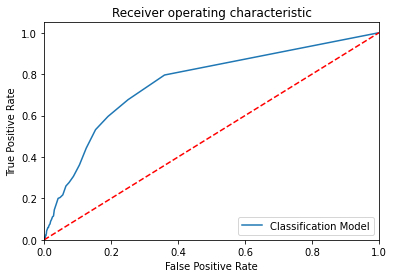

-----------------------------------------------------------------------------------------------------


In [19]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [20]:
CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,235,0,12785,0.982,NaN,0.000,0.000,1.000,MCC,0.500000,0.500
1,DecisionTreeClassifier(),15,220,250,12535,0.964,0.057,0.064,0.060,0.980,MCC,0.522138,0.522
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0,235,1,12784,0.982,0.000,0.000,0.000,1.000,MCC,0.499961,0.500
3,"(ExtraTreeClassifier(random_state=1993431299),...",1,234,9,12776,0.981,0.100,0.004,0.008,0.999,MCC,0.501776,0.501
